### Bar plot of Figure of Merit for WFD

- [time gaps](#time-gaps)
- [depth](#depth)
- [footprint](#footprint)
- [proper motion](#proper-motion)
- [all](#all)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [77]:
plt.style.use('seaborn')
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rcParams['axes.facecolor'] = "w"


In [78]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']
cols_all = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy', 'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy']

cols_same = [ 'uu',  'gg',  'rr',  'ii',  'zz',  'yy']

cols_diff = ['ug', 'ur', 'ui', 'uz', 'uy', 'gr', 'gi', 'gz', 'gy', 'ri', 'rz', 'ry', 'iz', 'iy', 'zy']


In [79]:
def scale(arr, mode=0):
    """scale array by max"""
    newarr = arr / arr.max()
    if mode==1:
        # scale to 0-1
        newarr = (arr - arr.min()) / (arr.max()-arr.min())
    return newarr

def get_family(df):
    """get family of opsim"""
    
    return df['db'].split('_')[0]


In [80]:
# get the name of all opsim dbs 
import os
import glob

workpath = os.getcwd()
dbpath = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases
os.chdir(dbpath)  # change to opsim database directory
dblist_all = glob.glob('*.db') 
#workpath = '/home/idies/workspace/Storage/lixl/persistent/LSST_OpSim/unknowns/timeGaps'
os.chdir(workpath) # change back to work directory
dblist_all.sort()


In [81]:
#dblist_all

In [82]:
def plot_barh(df_new, colon, byfamily=True, savefig=None, figsize=(8, 30), facecolor="#f1f1f3", **kwargs):
    """barh plot of FoM"""

    df_ = df_new.copy()
    df_['total'] = np.sum(df_[ colon ], axis=1)
    
    # get the max FOM of each family and sort by this
    df_mean_family = df_.groupby(by = "family", as_index=False).max()[['family', 'total']]
    df_ = df_.merge(df_mean_family, on='family', how='left', suffixes=['', '_fmean'],)
    
    df_ = df_.set_index('db')
    if byfamily:
        df_ = df_.sort_values(by=['total_fmean', 'total'], ascending=[True, True])
    else:
        # sort by total only
        df_ = df_.sort_values(by='total', ascending=True)
    
    df_[colon] = df_[colon]/len(colon)
    ax = df_[ colon ].plot.barh(stacked=True, figsize=figsize, **kwargs)
    
    # get positions of hlines
    if byfamily:
        hlines = df_.groupby(by='family', as_index=False, sort=False).count().cumsum()['total_fmean'].values - 0.5
        hlines = [hlines, hlines]
        ax.plot((-0.5, 1), hlines, 'k-', linewidth=1, alpha=0.5)
    
    plt.xlabel('normalized score', fontsize=20)
    plt.ylabel('')
    plt.legend(loc='lower right', frameon=True)
    plt.xlim([0,1.01])
    
    #ax = plt.gca()
    ax.set_facecolor(facecolor)
    
    if savefig!=None:
        plt.savefig(savefig, bbox_inches='tight')


def get_mycmap(pairs='diff'):
    """discrete colormap for filter pairs"""
    import numpy as np
    import matplotlib.colors as mcolors
    
    # colors in total
    # combine them and build a new colormap

    thecbases = [plt.cm.Blues,
                 plt.cm.Greens,
                 plt.cm.Purples,
                 plt.cm.Reds,
                 plt.cm.YlOrBr,
                 (240./255,230./255,140./255, 1.),
                ]

    grad = [thecbases[i](np.linspace(0, 1, 8-i)[::-1][1:]) for i in range(5)]
    
    #thecmaps = {'diff': , [thecbases[i](np.linspace(0, 1, 8-i)[::-1][1:]) for i in range(5)]
    #                'same':[thecbases[i](np.linspace(0, 1, 7-i)[-3 if i < 2 else -2]) 
    #                     for i in range(5)] + [thecbases[5]]}
    
    thecmaps = {'diff': [ grad[i] [ 1:6 - i ] for i in range(5) ] ,
                'same':[ grad[i] [ 1 if i!=5 else 0 ] for i in range(5) ] + [thecbases[5]]}
    
    colors = np.vstack( [c for c in thecmaps[pairs]] )
    mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
            
    #plt.pcolor(data, cmap=mymap)
    #plt.colorbar()
    #plt.show()
    return mymap



### time gaps

In [83]:

fomcsv = './data/df_tgapsFoM_WFD_v1.5.csv' # for tgaps
df_fom = pd.read_csv(fomcsv)

if 'db' not in df_fom.columns:
    df_fom['db'] = dblist_all

In [84]:
# scale fom table to 0 and 1
df_new = df_fom[ ['db'] ].copy()
for col in cols_all:
    # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
    df_new[col] = scale(df_fom[col]) 
    
df_new['db'] = df_new['db'].apply(lambda x: x.replace("_v1.5_10yrs.db", "") )
df_new['db'] = df_new['db'].apply(lambda x: x.replace("v1.5_10yrs.db", "") )

df_new['family'] = df_new.apply(get_family, axis=1)

df_new.head()

,db,uu,ug,ur,ui,uz,uy,gg,gr,gi,...,ri,rz,ry,ii,iz,iy,zz,zy,yy,family
0,agnddf,0.115324,0.247561,0.552855,0.558201,NaN,0.013252,0.166598,0.560783,0.512097,...,0.526766,0.332131,0.111697,0.034394,0.529173,0.459638,0.034776,0.541333,0.136425,agnddf
1,alt_dust,0.132108,0.302504,0.596737,0.641819,NaN,0.002467,0.202278,0.625466,0.789906,...,0.624991,0.559549,0.278464,0.033135,0.637565,0.767807,0.030810,0.702359,0.092177,alt
2,alt_roll_mod2_dust_sdf_0.20,0.138589,0.365459,0.626793,0.640030,NaN,0.003302,0.209477,0.673460,0.862348,...,0.783780,0.767490,0.437692,0.036390,0.703683,0.882131,0.035766,0.775614,0.099928,alt
3,baseline_2snaps,0.131843,0.217546,0.459239,0.435807,NaN,0.000726,0.187653,0.524360,0.472116,...,0.470700,0.314829,0.140882,0.031415,0.519336,0.509556,0.031539,0.549658,0.117800,baseline
4,baseline_samefilt,0.262402,0.026454,0.048121,0.082887,NaN,0.371274,0.256637,0.060848,0.139677,...,0.132935,0.112077,0.147623,0.027954,0.069658,0.078167,0.033584,0.091011,0.192188,baseline


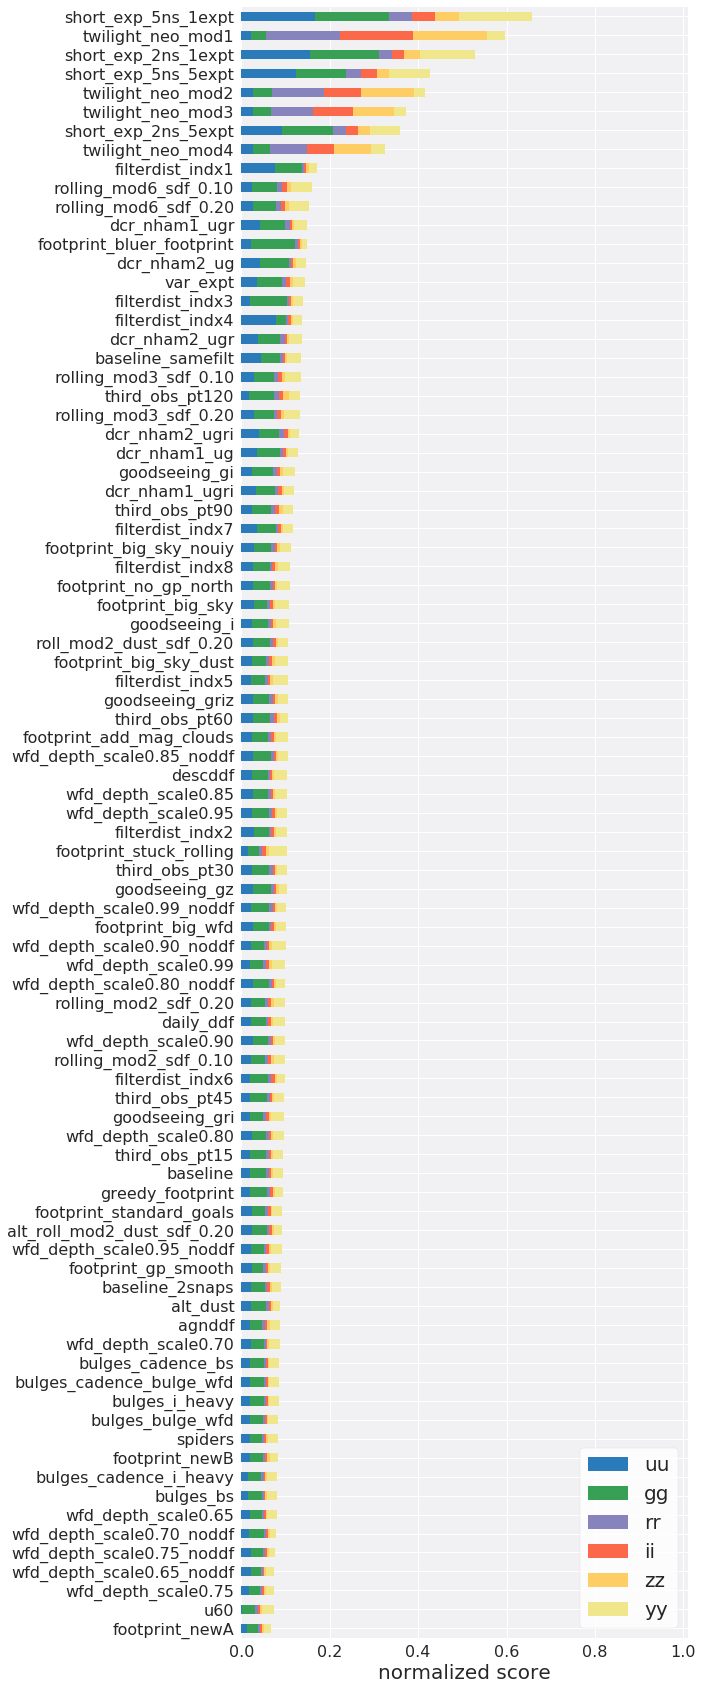

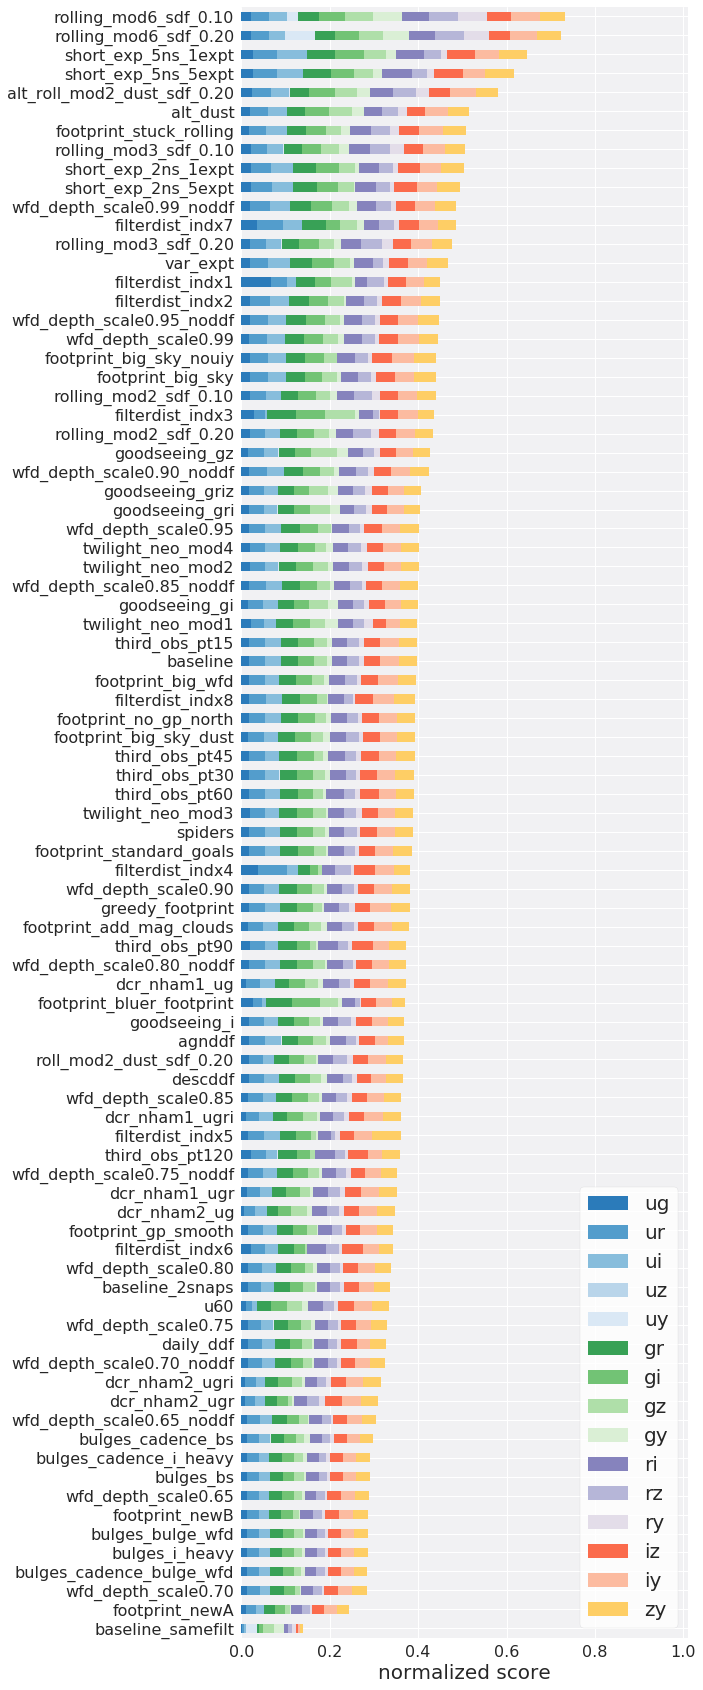

In [85]:
plot_barh(df_new, colon=cols_same, byfamily=False, savefig='figures/barh_tgaps_same.pdf', colormap=get_mycmap(pairs='same')) 
plot_barh(df_new, colon=cols_diff, byfamily=False, savefig='figures/barh_tgaps_diff.pdf', colormap=get_mycmap(pairs='diff') ) 



### depth

In [147]:
fomcsv = './data/depthFoM_v1.5.csv' # for tgaps
df_fom = pd.read_csv(fomcsv)

if 'db' not in df_fom.columns:
    df_fom['db'] = dblist_alla

In [148]:
df_fom.head()

,db,g,i,r,u,y,z
0,agnddf_v1.5_10yrs.db,-0.546022,-0.620969,-0.736184,-0.403453,-0.169655,-0.597247
1,alt_dust_v1.5_10yrs.db,-0.585299,-0.681369,-0.790087,-0.447163,-0.226876,-0.653423
2,alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db,-0.605729,-0.747880,-0.846155,-0.452051,-0.269783,-0.700780
3,baseline_2snaps_v1.5_10yrs.db,-0.613958,-0.653665,-0.776170,-0.590098,-0.178243,-0.608488
4,baseline_samefilt_v1.5_10yrs.db,-0.589748,-0.618501,-0.791027,-0.389743,-0.185773,-0.654298


In [149]:
# scale fom table to 0 and 1
df_new = df_fom[ ['db'] ].copy()
for col in filters:
    # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
    df_new[col] = scale(df_fom[col], mode=1) 
    
df_new['db'] = df_new['db'].apply(lambda x: x.replace("_v1.5_10yrs.db", "") )
df_new['db'] = df_new['db'].apply(lambda x: x.replace("v1.5_10yrs.db", "") )

df_new['family'] = df_new.apply(get_family, axis=1)

df_new.head()

,db,u,g,r,i,z,y,family
0,agnddf,0.791325,0.877899,0.947105,0.870985,0.915078,0.857861,agnddf
1,alt_dust,0.774883,0.820540,0.828575,0.771955,0.827502,0.494276,alt
2,alt_roll_mod2_dust_sdf_0.20,0.773044,0.790706,0.705284,0.662905,0.753673,0.221650,alt
3,baseline_2snaps,0.721116,0.778687,0.859178,0.817376,0.897554,0.803293,baseline
4,baseline_samefilt,0.796483,0.814043,0.826508,0.875032,0.826138,0.755444,baseline


In [150]:
df_new['db'].shape

(86,)

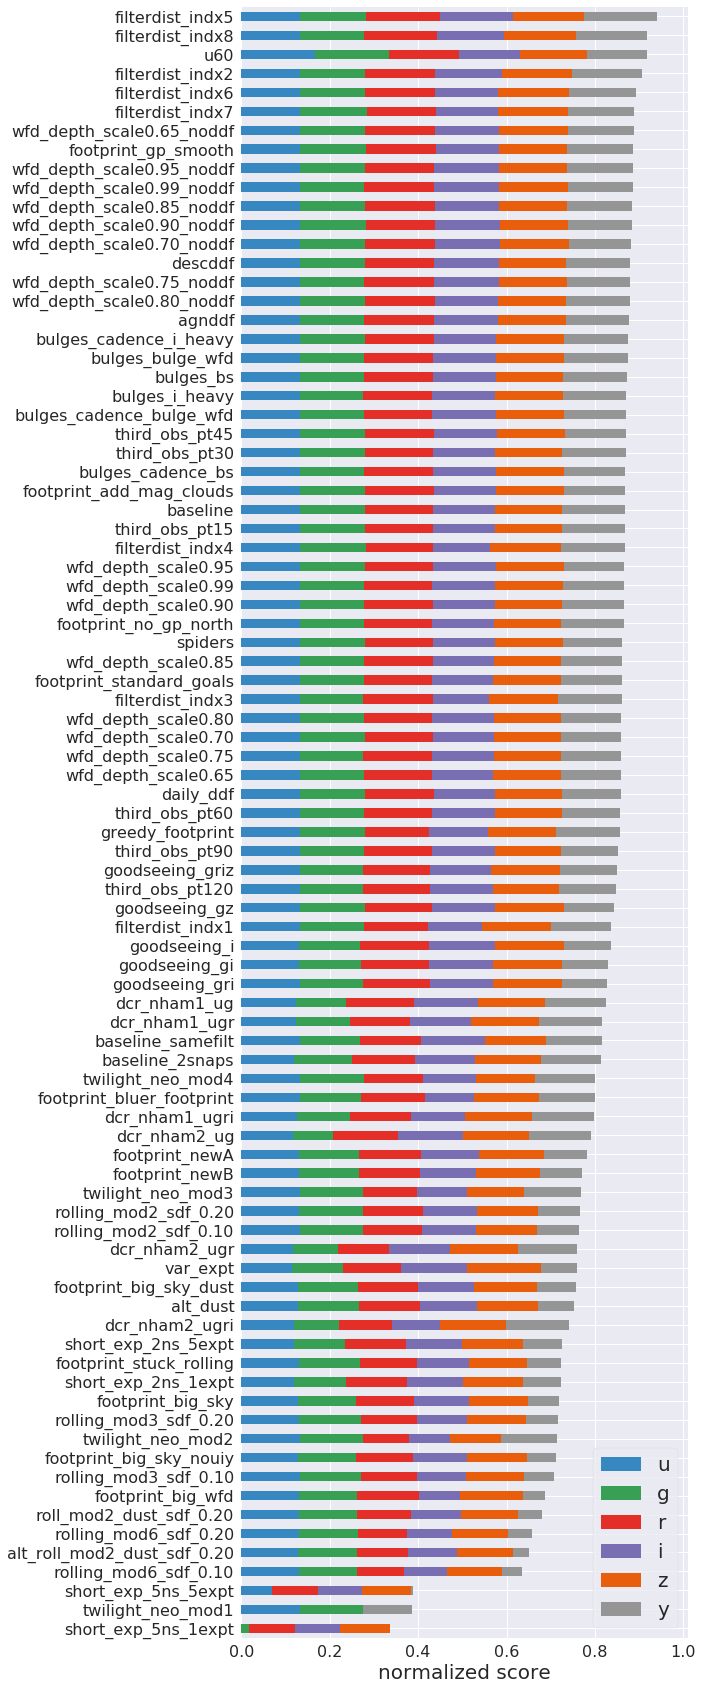

In [151]:
plot_barh(df_new, colon=filters, byfamily=False, savefig='figures/barh_depth.pdf', colormap=get_mycmap(pairs='same')) 



### footprint

footprint

In [86]:
fomcsv = './data/df_Nfields_WFD_v1.5.csv' # for tgaps
df_fom = pd.read_csv(fomcsv)

if 'db' not in df_fom.columns:
    df_fom['db'] = dblist_all

In [53]:
np.max(df_fom)

uu                                 1358
ug                                 1371
ur                                 1353
ui                                 1075
uz                                    0
uy                                  167
gg                                 1353
gr                                 1347
gi                                 1098
gz                                  931
gy                                  488
rr                                 1340
ri                                 1350
rz                                 1149
ry                                  979
ii                                 1340
iz                                 1339
iy                                 1075
zz                                 1340
zy                                 1340
yy                                 1339
db    wfd_depth_scale0.99_v1.5_10yrs.db
dtype: object

In [87]:
# scale fom table to 0 and 1
df_new = df_fom[ ['db'] ].copy()
for col in cols_all:
    # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
    df_new[col] = scale(df_fom[col], mode=1) 
    
df_new['db'] = df_new['db'].apply(lambda x: x.replace("_v1.5_10yrs.db", "") )
df_new['db'] = df_new['db'].apply(lambda x: x.replace("v1.5_10yrs.db", "") )

df_new['family'] = df_new.apply(get_family, axis=1)

df_new.head(5)

,db,uu,ug,ur,ui,uz,uy,gg,gr,gi,...,ri,rz,ry,ii,iz,iy,zz,zy,yy,family
0,agnddf,0.570692,0.477024,0.569106,0.645070,NaN,0.259036,0.477811,0.480327,0.584940,...,0.557037,0.486438,0.193426,0.443284,0.411501,0.400930,0.458209,0.391045,0.455564,agnddf
1,alt_dust,0.161267,0.439096,0.489283,0.750235,NaN,0.150602,0.102811,0.434298,0.791552,...,0.530370,0.792948,0.701643,0.060448,0.413742,0.814884,0.080597,0.580597,0.135176,alt
2,alt_roll_mod2_dust_sdf_0.20,0.229013,0.614880,0.481892,0.834742,NaN,0.295181,0.225592,0.523385,0.894399,...,0.651111,0.922242,0.979772,0.041791,0.519044,0.978605,0.063433,0.663433,0.156833,alt
3,baseline_2snaps,0.170839,0.284464,0.302291,0.405634,NaN,0.138554,0.110947,0.290275,0.403122,...,0.325926,0.453888,0.275601,0.041791,0.277819,0.419535,0.065672,0.347015,0.117999,baseline
4,baseline_samefilt,0.934462,0.000000,0.000000,0.028169,NaN,0.746988,0.649408,0.000000,0.000000,...,0.000000,0.000000,0.183312,0.660448,0.000000,0.000000,0.751493,0.000000,0.549664,baseline


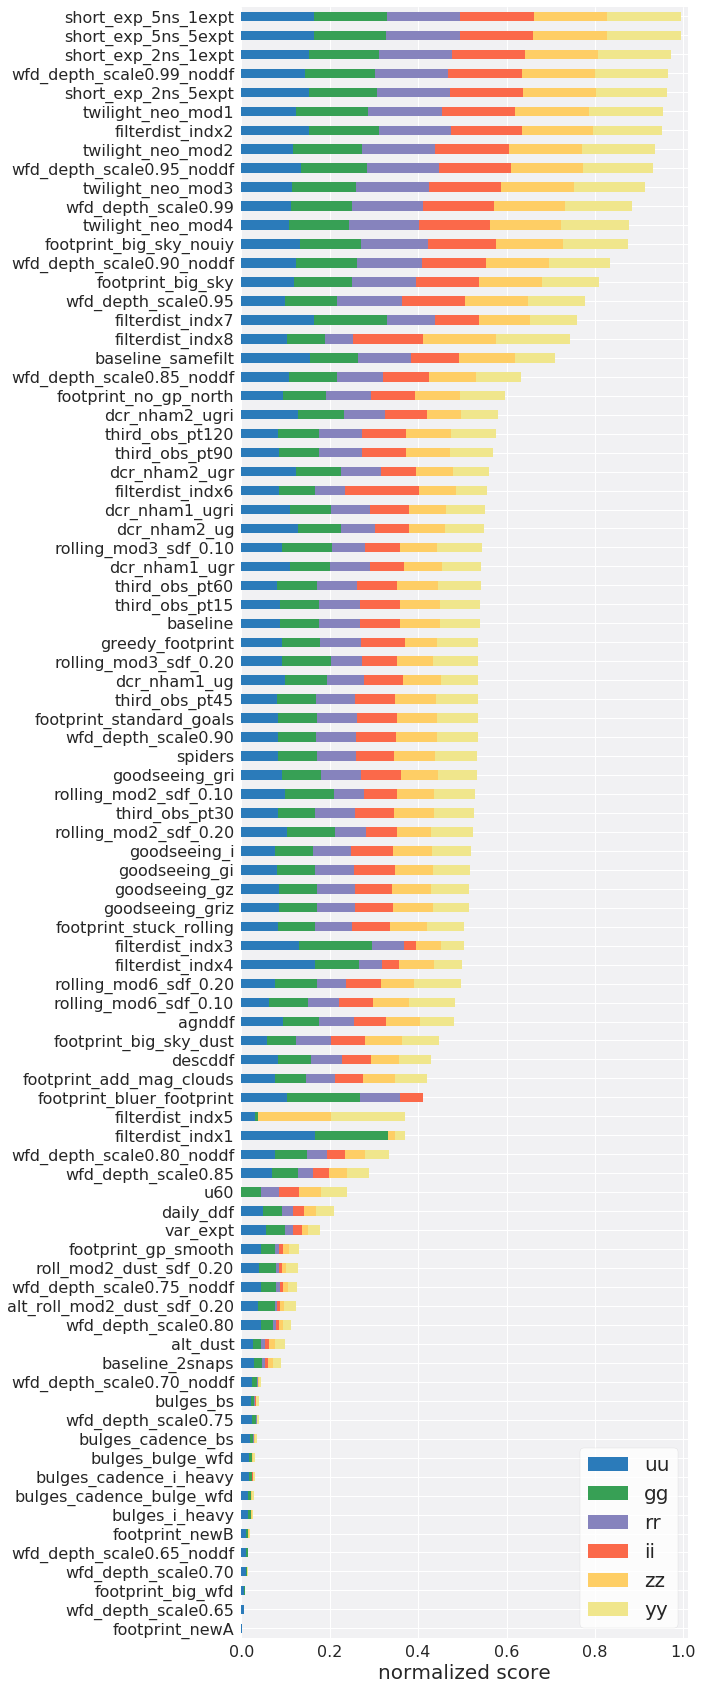

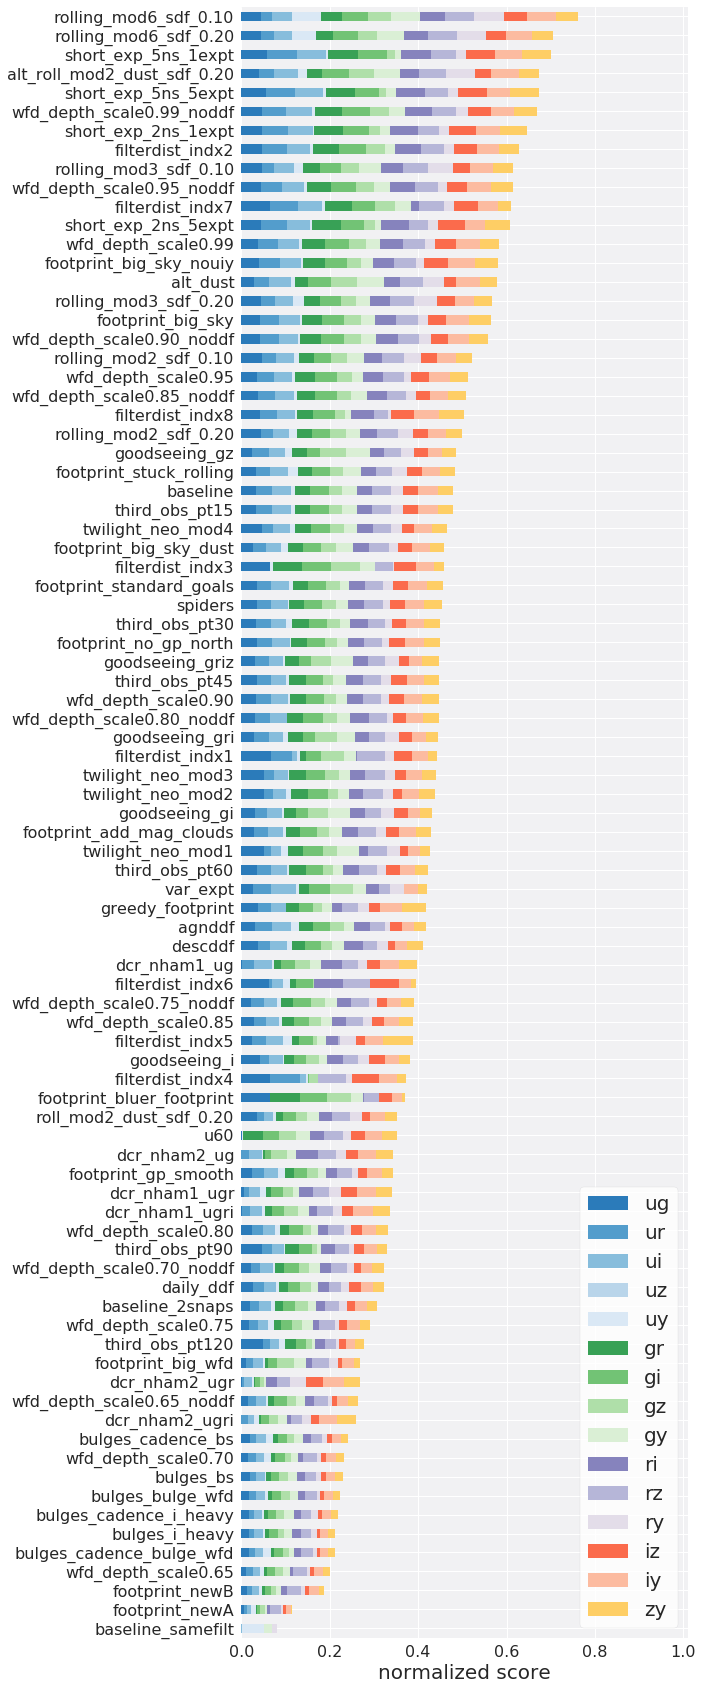

In [88]:
plot_barh(df_new, colon=cols_same, byfamily=False, savefig='figures/barh_EG_same.pdf', colormap=get_mycmap(pairs='same')) 

plot_barh(df_new, colon=cols_diff, byfamily=False, savefig='figures/barh_EG_diff.pdf', colormap=get_mycmap(pairs='diff')) 



star density

In [89]:
fomcsv = './data/df_Nstars_WFD_v1.5.csv'
df_fom = pd.read_csv(fomcsv)

if 'db' not in df_fom.columns:
    df_fom['db'] = dblist_all


In [90]:
# scale fom table to 0 and 1
df_new = df_fom[ ['db'] ].copy()
for col in cols_all:
    # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
    df_new[col] = scale(df_fom[col], mode=1) 
    
df_new['db'] = df_new['db'].apply(lambda x: x.replace("_v1.5_10yrs.db", "") )
df_new['db'] = df_new['db'].apply(lambda x: x.replace("v1.5_10yrs.db", "") )

df_new['family'] = df_new.apply(get_family, axis=1)

df_new.head()

,db,uu,ug,ur,ui,uz,uy,gg,gr,gi,...,ri,rz,ry,ii,iz,iy,zz,zy,yy,family
0,agnddf,0.574965,0.533391,0.487320,0.603553,NaN,0.089630,0.569602,0.520399,0.644787,...,0.590619,0.591361,0.278052,0.529688,0.520869,0.543909,0.564467,0.484845,0.559561,agnddf
1,alt_dust,0.089177,0.274709,0.232227,0.410006,NaN,0.045645,0.081444,0.248722,0.429673,...,0.306488,0.412841,0.437391,0.058041,0.196481,0.449298,0.063688,0.326076,0.110684,alt
2,alt_roll_mod2_dust_sdf_0.20,0.090557,0.304014,0.221097,0.442595,NaN,0.785796,0.120003,0.289160,0.449786,...,0.346852,0.483486,0.480256,0.042744,0.258525,0.510262,0.054794,0.362079,0.103028,alt
3,baseline_2snaps,0.250192,0.332770,0.313347,0.511368,NaN,0.332251,0.167649,0.331264,0.454222,...,0.417755,0.500001,0.368877,0.105752,0.293100,0.501710,0.111276,0.395451,0.153974,baseline
4,baseline_samefilt,0.821304,0.000000,0.000000,0.036614,NaN,0.919520,0.646082,0.000000,0.001965,...,0.000000,0.000000,0.299451,0.684524,0.000000,0.000000,0.744764,0.000000,0.571073,baseline


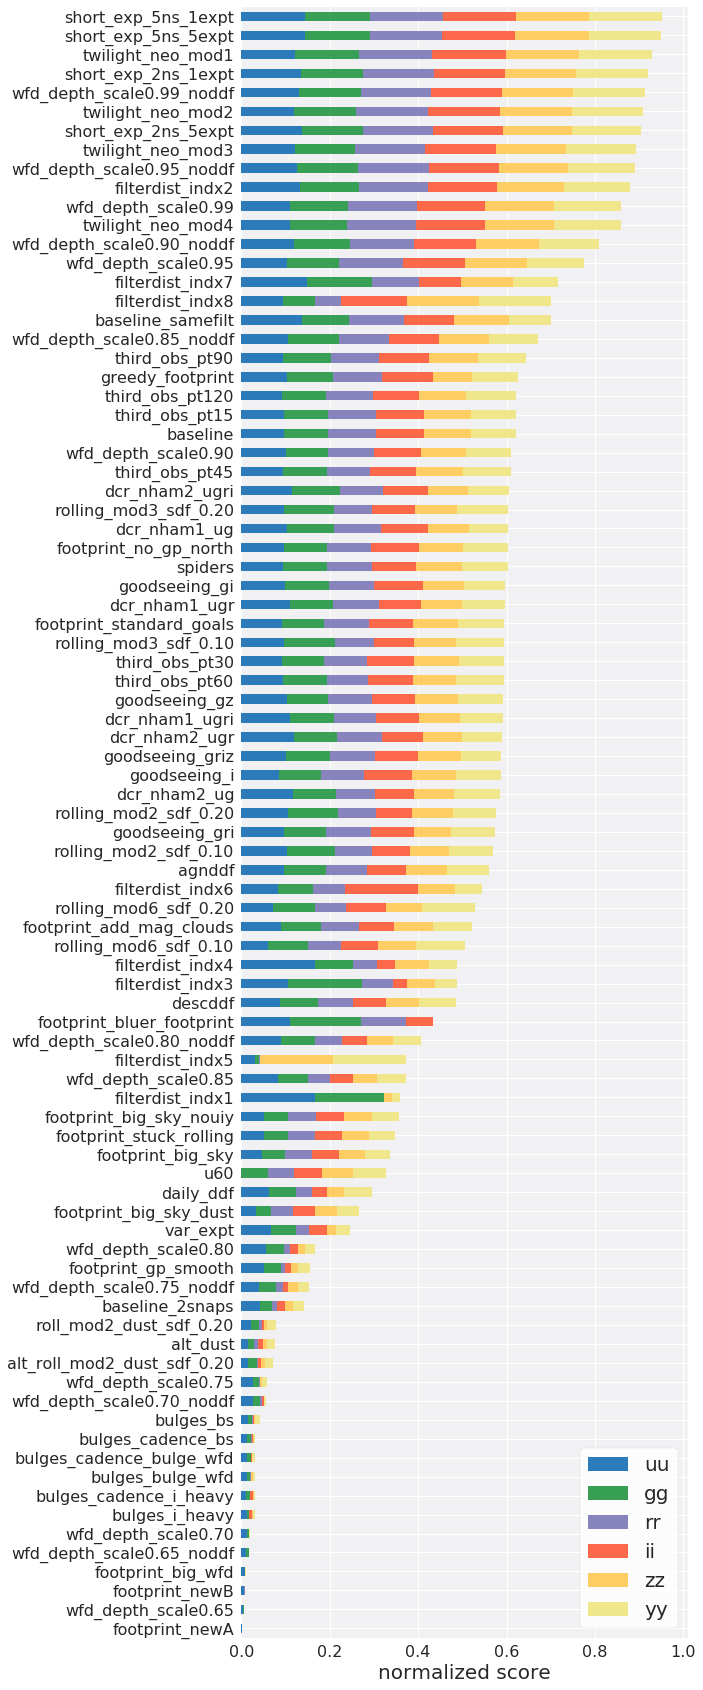

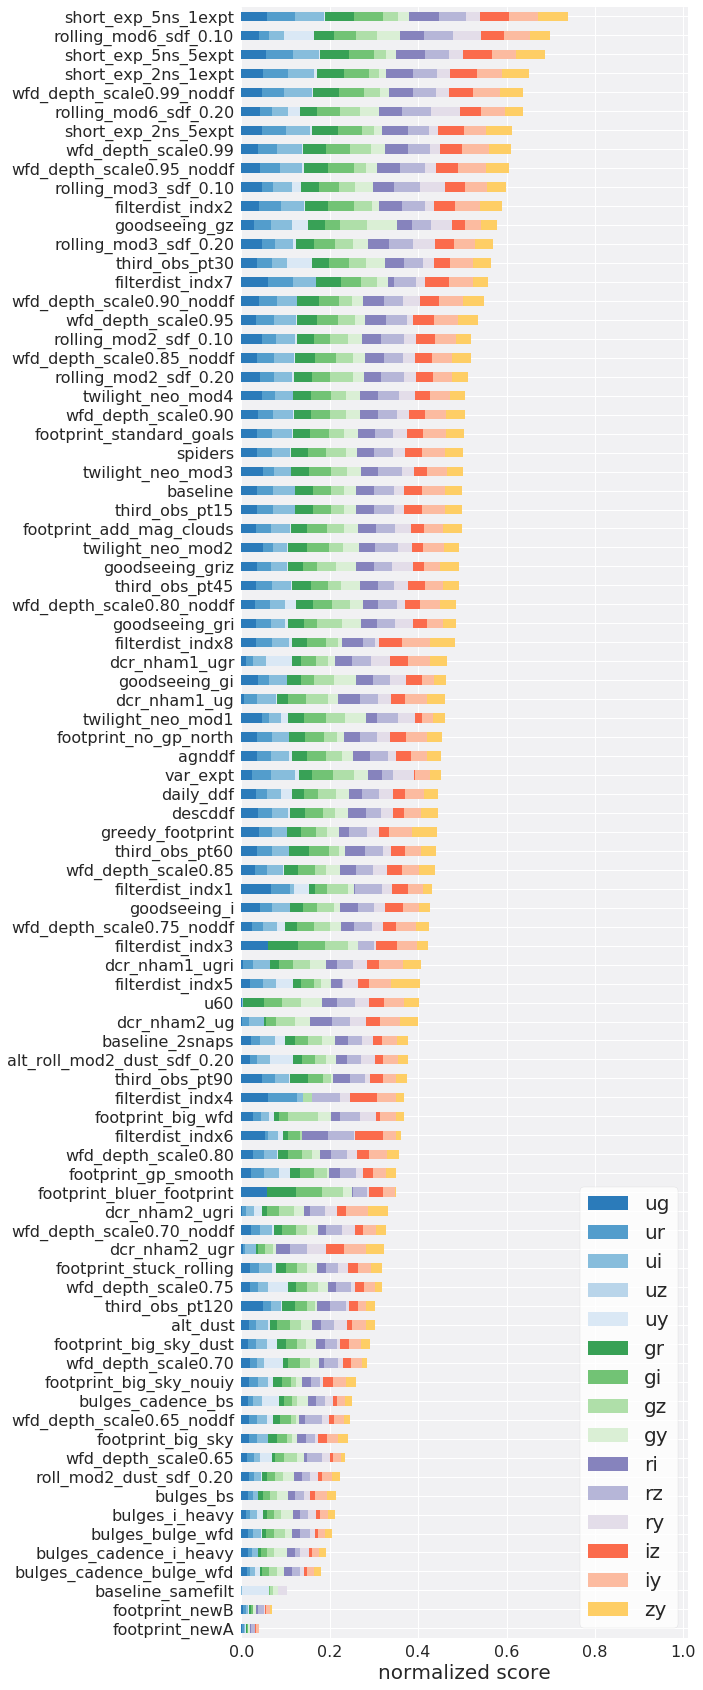

In [91]:
plot_barh(df_new, colon=cols_same, byfamily=False, savefig='figures/barh_Gal_same.pdf', colormap=get_mycmap(pairs='same')) 

plot_barh(df_new, colon=cols_diff, byfamily=False, savefig='figures/barh_Gal_diff.pdf', colormap=get_mycmap(pairs='diff')) 



### proper motion

### all

In [216]:
fomcsv = './data/df_radar.csv' 
df_fom = pd.read_csv(fomcsv)
df_fom.head()

,db,FoM_CI,FoM_LS,FoM_PMT,total,FoM_tgaps,FoM_EG,FoM_Gal,FoM_depth
0,agnddf_v1.5_10yrs,0.555133,NaN,0.583599,0.692068,0.443376,0.564762,0.610002,0.931742
1,alt_dust_v1.5_10yrs,0.768061,NaN,0.523405,0.784893,0.603965,0.554701,0.307607,0.800220
2,alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs,0.768061,NaN,0.448807,0.739556,0.679559,0.644424,0.371077,0.692088
3,baseline_2snaps_v1.5_10yrs,0.577947,NaN,0.845955,0.865381,0.409759,0.330473,0.396784,0.863893
4,baseline_v1.5_10yrs,0.566540,NaN,0.663306,0.747443,0.477122,0.636859,0.673557,0.922776


In [217]:
FoMvars = ['FoM_tgaps', 'FoM_depth', 'FoM_EG', 'FoM_Gal', 'FoM_PMT']


In [218]:
# scale fom table to 0 and 1
df_new = df_fom[ ['db'] ].copy()
for col in FoMvars:
    # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
    #df_new[col] = scale(df_fom[col], mode=1) 
    df_new[col] = df_fom[col]
    
df_new['db'] = df_new['db'].apply(lambda x: x.replace("_v1.5_10yrs", "") )
df_new['db'] = df_new['db'].apply(lambda x: x.replace("v1.5_10yrs", "") )

df_new['family'] = df_new.apply(get_family, axis=1)

df_new.head()

,db,FoM_tgaps,FoM_depth,FoM_EG,FoM_Gal,FoM_PMT,family
0,agnddf,0.443376,0.931742,0.564762,0.610002,0.583599,agnddf
1,alt_dust,0.603965,0.800220,0.554701,0.307607,0.523405,alt
2,alt_roll_mod2_dust_sdf_0.20,0.679559,0.692088,0.644424,0.371077,0.448807,alt
3,baseline_2snaps,0.409759,0.863893,0.330473,0.396784,0.845955,baseline
4,baseline,0.477122,0.922776,0.636859,0.673557,0.663306,baseline


In [219]:
FoMvars

['FoM_tgaps', 'FoM_depth', 'FoM_EG', 'FoM_Gal', 'FoM_PMT']

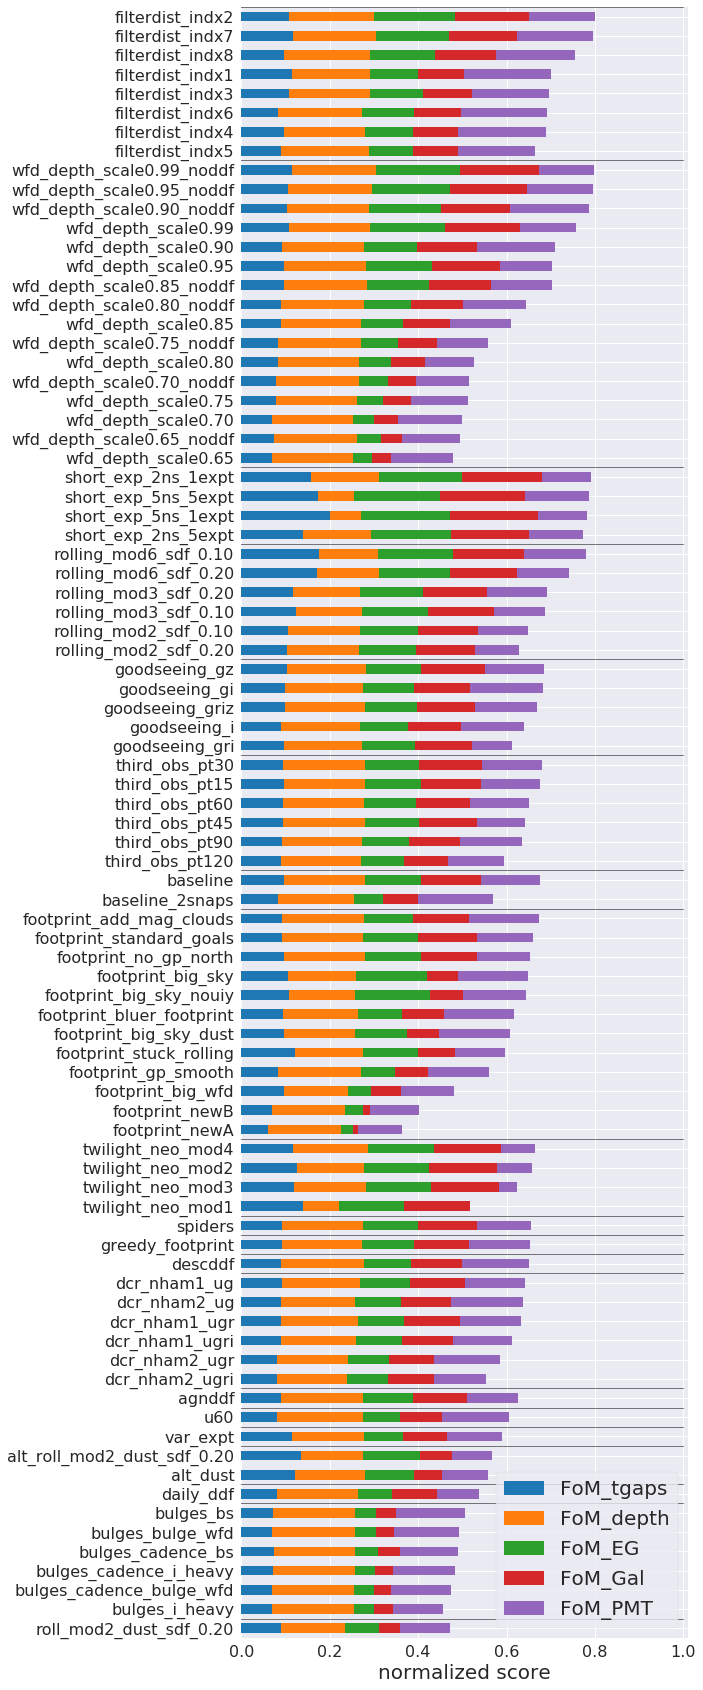

In [230]:
import matplotlib.colors as mcolors
colors = plt.cm.tab10( np.linspace(0., 1, 10) )[:5]
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
    

plot_barh(df_new, colon=FoMvars, byfamily=True, savefig='figures/barh_all.pdf', colormap=mymap ) 

